In [75]:
import pandas as pd
import numpy as np

from xgboost import XGBClassifier

# This is the function that helps plot feature importance 
from xgboost import plot_importance

from sklearn.model_selection import train_test_split, GridSearchCV, PredefinedSplit

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, \
    ConfusionMatrixDisplay, RocCurveDisplay

import matplotlib.pyplot as plt
pd.set_option('display.max_columns',None)

import pickle

In [36]:
df_original = pd.read_csv('Churn_Modelling.csv')
df_original.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [37]:
churn_df = df_original.drop(columns=['RowNumber', 'CustomerId','Surname', 'Gender'])
churn_df.head()

,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,41,1,83807.86,1,0,1,112542.58,0
2,502,France,42,8,159660.80,3,1,0,113931.57,1
3,699,France,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,43,2,125510.82,1,1,1,79084.10,0


In [38]:
churn_df2 = pd.get_dummies(churn_df, columns=['Geography'], drop_first=True, dtype=int)
churn_df2.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,619,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1


Modeling

In [52]:
X = churn_df2.drop('Exited', axis=1)
y = churn_df2['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

In [54]:
xgb = XGBClassifier(objective='binary:logistic', random_state=0) #binary:logistic, for binary classification.Refer to the XGBoost documentation for different kinds data.


In [55]:
cv_params = {'max_depth': [4,5,6,7,8],
             'min_child_weight': [1,2,3,4,5],
             'learning_rate':[0.1, 0.2 , 0.3],
             'n_estimators': [75, 100, 125]}

scoring = ['accuracy', 'precision', 'recall', 'f1']

xgb_cv = GridSearchCV(xgb, param_grid=cv_params, scoring=scoring, cv=5, refit= 'f1')

In [56]:
%%time

# xgb_cv.fit(X_train, y_train) # comment the code after writing the pickle


CPU times: total: 17min 48s
Wall time: 1min 51s


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=0, ...),
             param_grid={'learning_rate': [0.1, 0.2, 0.3],
                         'max_depth': [4, 5, 6, 7, 8],
                         'min_child_weight': [1, 2, 3, 4, 5],
                         'n_estimators': [75, 100, 125]},
             refit='f1', scoring=['accuracy', 'precision', 'recall', 'f1'])

Pickle : 1. Define path
         2. Write the file
         3. Read the model then comment the fitting code

In [57]:
path = r'...'

In [58]:
# pickle the model
with open (path+'xgb_cv_model.pickle', 'wb') as to_write:
    pickle.dump(xgb_cv, to_write)

In [59]:
# Open pikled model
with open(path+'xgb_cv_model.pickle','rb') as to_read:
    xgb_cv = pickle.load(to_read)

In [60]:
# open the pickled random forest model
with open(path+'rf_cv_model.pickle', 'rb') as to_read:
    rf_cv = pickle.load(to_read)


# rf_cv.fit(X_train, y_train)
print('F1 score random forest CV', rf_cv.best_score_)
print('F1 score XGb CV', xgb_cv.best_score_)

c:\Users\User\anaconda3.1\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
900 fits failed out of a total of 2700.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
900 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\User\anaconda3.1\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\User\anaconda3.1\Lib\site-packages\sklearn\ensemble\_forest.py", line 340, in fit
    self._validate_params()
  File "c:\Users\User\anaconda3.1\Lib\site-packages\sklearn\base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\User\anaconda3.1\Lib\sit

F1 score random forest CV 0.580528563620339
F1 score XGb CV 0.5811316484816358


In [62]:
def make_results(model_name, model_object):
    # Get all the results from the CV and put them in df
    cv_results = pd.DataFrame(model_object.cv_results_)

    #Isolate the row of the df with the max(mean f1 score)
    best_estimator_results = cv_results.iloc[cv_results['mean_test_f1'].idxmax(), :]

    # Extract accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    # Create table of results
    table = pd.DataFrame({'Model': [model_name],
                          'F1': [f1],
                          'Recall': [recall],
                          'Precision': [precision],
                          'Accuracy': [accuracy]
                         }                        )
  
    return table

In [63]:
# CReate xgb model results table
xgb_cv_results = make_results('XGBoost CV', xgb_cv)
xgb_cv_results

,Model,F1,Recall,Precision,Accuracy
0,XGBoost CV,0.581132,0.46729,0.77566,0.8632


Now we'll read back in the master results table from the last notebook and concatenate it with the results we just created above

In [64]:
# Read in master results table
results = pd.read_csv(path+'results2.csv')

# Concatentate xgb model results table with master results table
results = pd.concat([xgb_cv_results, results]).sort_values(by=['F1'], 
                                                           ascending=False)
results

,Model,F1,Recall,Precision,Accuracy
0,XGBoost CV,0.581132,0.467290,0.775660,0.863200
0,Random Forest CV,0.580529,0.472517,0.756289,0.861333
1,Random Forest CV,0.580529,0.472517,0.756289,0.861333
2,NaN,0.580529,0.472517,0.756289,0.861333


In [65]:
# Predict on test data
xgb_cv_preds = xgb_cv.predict(X_test)
print('F1 score final XGB model: ', f1_score(y_test, xgb_cv_preds))
print('Recall score final XGB model: ', recall_score(y_test, xgb_cv_preds))
print('Precision score final XGB model: ', precision_score(y_test, xgb_cv_preds))
print('Accuracy score final XGB model: ', accuracy_score(y_test, xgb_cv_preds))

F1 score final XGB model:  0.6140776699029127
Recall score final XGB model:  0.49705304518664045
Precision score final XGB model:  0.8031746031746032
Accuracy score final XGB model:  0.8728


In [70]:
# Create helper function to plot confusion matrix
def conf_matrix_plot(model, x_data, y_data):
    '''
    Accepts as argument model object, X data (test or validate), and y data (test or validate). 
    Returns a plot of confusion matrix for predictions on y data.
    ''' 
    model_pred = model.predict(x_data)
    cm = confusion_matrix(y_data, model_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=model.classes_)
  
    disp.plot()
    plt.show()

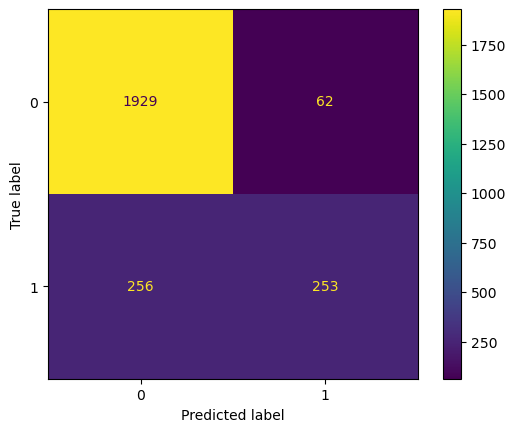

In [71]:
conf_matrix_plot(xgb_cv, X_test, y_test)

From the 2,500 people in our test data, there are 509 customers who left the bank. Of those, our model captures 256. The confusion matrix indicates that, when the model makes an error, it’s usually a Type II error&mdash;it gives a false negative by failing to predict that a customer will leave. On the other hand, it makes far fewer Type I errors, which are false positives.

Ultimately, whether these results are acceptable depends on the costs of the measures taken to prevent a customer from leaving versus the value of retaining them. In this case, bank leaders may decide that they’d rather have more true positives, even if it means also capturing significantly more false positives. If so, perhaps optimizing the models based on their F1 scores is insufficient. Maybe we’d prioritize a different evaluation metric. 

One way to modify the decision-making without retraining the model is to adjust the threshold at which the model predicts a positive response. In other words, the model determines a probability that a given customer will churn. By default, if that probability is ≥ 0.50, then the model will label that customer as churned. Probabilities of < 0.50 would designate a non-responder. But it's possible to adjust this decision threshold. For instance, if we set the threshold to 0.25, then the model would label customers with predicted probabilities ≥ 0.25 as churned, and those with probabilities < 0.25 as not churned. This would increase the recall of the model, but decrease the accuracy. 

In any case, what is certain is that our model helps the bank. Consider the results if decision-makers had done nothing. In that case, they’d expect to lose 509 customers. Alternatively, they could give everybody an incentive to stay. That would cost the bank for each of the 2,500 customers in our test set. Finally, the bank could give incentives at random&mdash;say, by flipping a coin. Doing this would incentivize about the same number of true responders as our model selects. But the bank would lose a lot of money offering the incentives to people who aren’t likely to leave, and our model is very good at identifying these customers. 




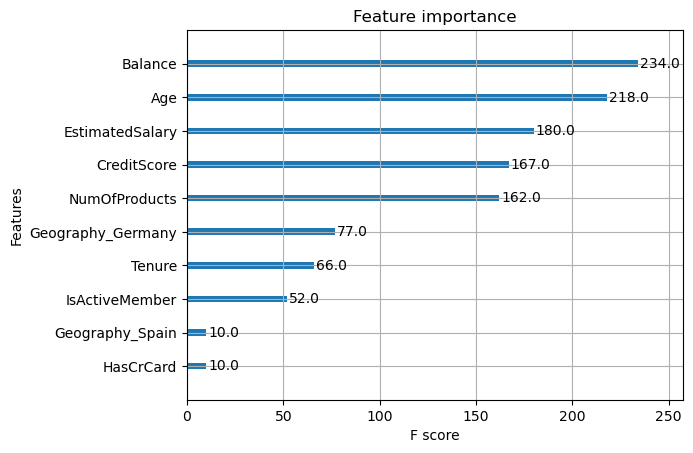

In [74]:
plot_importance(xgb_cv.best_estimator_);

This tells us that the four most important features used by our model were EstimatedSalary, Balance, CreditScore, and Age. This is very useful information. In a full project, we'd go back and examine these features very closely to understand how and why they are affecting churn.

At this point, it would also be a good idea to go back and add the model predictions and Gender feature to each sample in our data. Then we could examine how evenly the model distributes its error across reported gender identities.

In [76]:
# Split the data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.25,random_state=0)

split_index = [0 if x in X_val.index else -1 for x in X_train.index ]
custom_split = PredefinedSplit(split_index)

In [77]:
# Tune hyperparameters using cross-validation on the training set

xgb_val = GridSearchCV(xgb, cv_params, cv = custom_split, refit='f1', n_jobs=-1, verbose=1 )

In [79]:
%%time
# Fit the model. 

xgb_val.fit(X_train, y_train)

Fitting 1 folds for each of 225 candidates, totalling 225 fits
CPU times: total: 969 ms
Wall time: 10.1 s


GridSearchCV(cv=PredefinedSplit(test_fold=array([-1,  0, ...,  0,  0])),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     i...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=0, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.2, 0.3],
                         'max_depth': [4, 5, 6, 7, 8],
                         'min_child_weight': [1, 2, 3, 4, 5],
                         'n_estimators': [75, 100, 125]},
             refit='f1', verbose=1)

In [80]:
# Obtain optimal parameters

xgb_val.best_params_

{'learning_rate': 0.1,
 'max_depth': 4,
 'min_child_weight': 5,
 'n_estimators': 75}

In [83]:
# Use optimal parameters on GridSearchCV

xgb_opt = XGBClassifier(n_estimators = 75, max_depth= 4, min_child_weight =  5, 
              learning_rate = 0.9 , random_state=0)

In [84]:
xgb_opt.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.9, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=75, n_jobs=None,
              num_parallel_tree=None, random_state=0, ...)

In [85]:
# Predict on test set

y_pred = xgb_opt.predict(X_test)

In [86]:
# Get precision score

pc_test = precision_score(y_test, y_pred) 
print('Precision: ','%0.3f'% pc_test)
print(f"which means of all positive predictions, {pc_test:0.1%} prediction are true positive.")

Precision:  0.645
which means of all positive predictions, 64.5% prediction are true positive.
